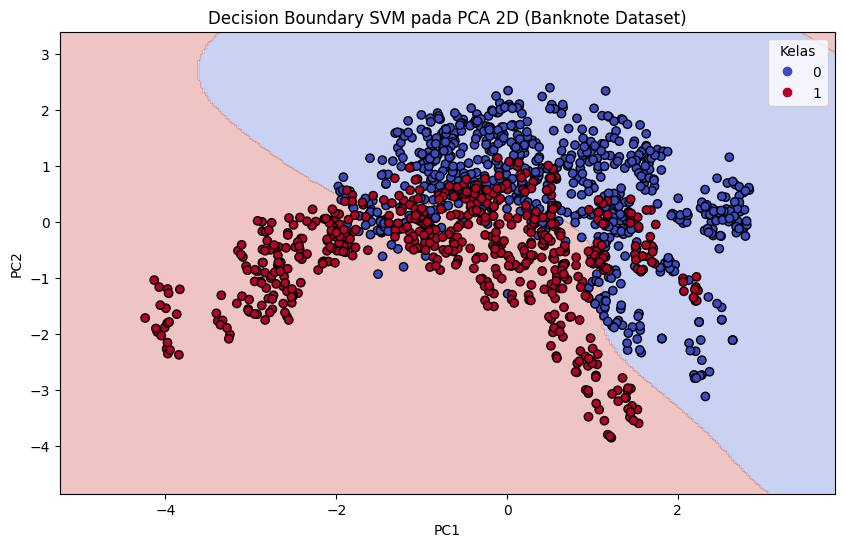

In [10]:
# File sudah diunggah, sekarang kita lanjutkan dengan membuat decision boundary SVM berdasarkan data PCA-nya
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the dataset
data = pd.read_csv("data_banknote_authentication.csv", header=None)

# Pisahkan fitur dan label
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA reduksi ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Latih SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Buat grid untuk plotting decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Prediksi seluruh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasilnya
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Kelas")
plt.title("Decision Boundary SVM pada PCA 2D (Banknote Dataset)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()